In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log
from list_dict import rename_th_expend,region_list,region_dict,rename_country_dict
from format_func import format_th_arrival,format_th_expend,format_th_stay_expend

## Reading data

In [46]:
# arrival number in thailand
th_arrival_2020 = pd.read_excel('data_source/2020_TH_no_of_arrival.xlsx',header=3)
th_arrival_2021 = pd.read_excel('data_source/2021_TH_no_of_arrival.xlsx',header=3)
th_arrival_2022 = pd.read_excel('data_source/2022_TH_no_of_arrival.xlsx',header=3)


# tourist expenditure thailand
th_expenditure_2018 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_by_expenditure_item_q_1_q_4_2018.xlsx'
,header=5,usecols='A:J')

th_expenditure_2019 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_by_expenditure_item_q_1_q_4_2019.xlsx'
,header=5,usecols='A:J')

# tourist expenditure v staying
th_stay_expend_2018 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_q_1_q_4_2018.xlsx'
,header=5,usecols='A:D,F')
th_stay_expend_2019 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_q_1_q_4_2019.xlsx'
,header=5,usecols='A:D,F')

In [47]:
th_stay_expend_2019

,of Residence,Unnamed: 1,(Days),Baht/Day,Mil. Baht
0,East Asia,27669963.0,7.08,5743.76,1125223.49
1,Asean,10876922.0,5.90,5335.05,342370.64
2,Brunei,19858.0,7.06,6741.42,945.13
3,Cambodia,925437.0,7.39,5743.24,39277.88
4,Indonesia,706908.0,5.68,4566.01,18333.62
...,...,...,...,...,...
58,Africa,196819.0,12.22,5531.79,13304.65
59,South Africa,89750.0,13.01,4907.78,5730.55
60,Others in Africa,107069.0,11.56,6119.41,7574.10
61,Grand Total,39916251.0,9.26,5172.29,1911807.95


## Transforming

In [48]:
# format
th_arrival_2020 = format_th_arrival(th_arrival_2020)
th_arrival_2021 = format_th_arrival(th_arrival_2021)
th_arrival_2022 = format_th_arrival(th_arrival_2022)


th_expenditure_2018 = format_th_expend(th_expenditure_2018)
th_expenditure_2019 = format_th_expend(th_expenditure_2019)

th_stay_expend_2018 = format_th_stay_expend(th_stay_expend_2018)
th_stay_expend_2019 = format_th_stay_expend(th_stay_expend_2019)

In [49]:
# get value vars
value_vars = th_expenditure_2018.columns.values.tolist()
value_vars.remove('Country')

# melt
# th_expenditure_2018_melt = pd.melt(th_expenditure_2018,id_vars='Country',value_vars=value_vars,var_name='Fields',value_name='2018')
# th_expenditure_2019_melt = pd.melt(th_expenditure_2019,id_vars='Country',value_vars=value_vars,var_name='Fields',value_name='2019')

# drop columns
th_arrival_2021.drop(columns=['2020P'],inplace=True)
th_arrival_2022.drop(columns=['2021P'],inplace=True)

In [50]:
# merge
th_arrival = pd.merge(th_arrival_2020,th_arrival_2021,how='inner',on='Nationality').merge(th_arrival_2022,how='inner',on='Nationality')
th_arrival = th_arrival[['Nationality', 2019,'2020P', '2021P', '2022P']]

th_arrival.rename(columns={2019:'2019','2020P':'2020','2021P':'2021','2022P':'2022'},inplace=True)

# th_expend = pd.merge(th_expenditure_2018_melt,th_expenditure_2019_melt,how='left',on=['Country','Fields'])
th_expend = pd.merge(th_expenditure_2018,th_expenditure_2019,how='left',on=['Country'])

# arrival per region
region_th_arrival = th_arrival.loc[th_arrival['Nationality'].isin(region_list)]

# expend per region
region_th_expend = th_expend.loc[th_expend['Country'].isin(region_list)]

# arrival per country
country_th_arrival = th_arrival.loc[~th_arrival['Nationality'].isin(region_list)]
country_th_expend = th_expend.loc[~th_expend['Country'].isin(region_list)]

# stay and spend per country
country_th_stay_spend_2018 = th_stay_expend_2018.loc[~th_stay_expend_2018['Country'].isin(region_list)]
country_th_stay_spend_2019 = th_stay_expend_2019.loc[~th_stay_expend_2018['Country'].isin(region_list)]

# stay and spend per region
region_th_stay_spend_2018 = th_stay_expend_2018.loc[th_stay_expend_2018['Country'].isin(region_list)]
region_th_stay_spend_2019 = th_stay_expend_2019.loc[th_stay_expend_2018['Country'].isin(region_list)]

In [51]:
# melt
region_th_arrival_melt = region_th_arrival.melt(id_vars='Nationality',value_vars=['2019','2020','2021','2022'],
                                                    value_name='num_arrival',var_name='year')

country_th_arrival_melt = country_th_arrival.melt(id_vars='Nationality',value_vars=['2019','2020','2021','2022'],
                                                    value_name='num_arrival',var_name='year')

In [52]:
# scale arrival from unit to million
region_th_arrival_melt['num_arrival'] = region_th_arrival_melt['num_arrival']/1000000
country_th_arrival_melt['num_arrival'] = country_th_arrival_melt['num_arrival']/1000000

#### Percent Change

In [53]:
country_th_arrival_melt.sort_values(by=['Nationality','year'],inplace=True)
region_th_arrival_melt.sort_values(by=['Nationality','year'],inplace=True)
country_th_arrival_melt['base_pct_change'] = country_th_arrival_melt.groupby('Nationality')['num_arrival'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
region_th_arrival_melt['base_pct_change'] = region_th_arrival_melt.groupby('Nationality')['num_arrival'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))

/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_7845/1882609238.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  country_th_arrival_melt['base_pct_change'] = country_th_arrival_melt.groupby('Nationality')['num_arrival'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_7845/1882609238.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(...

In [54]:
region_arrival = region_th_arrival_melt.groupby('Nationality')['num_arrival'].sum().sort_values()
df_region_arrival = pd.DataFrame({'Nationality': region_arrival.index, 'Total Arrivals': region_arrival.values})
df_region_arrival = df_region_arrival[df_region_arrival['Nationality'] != 'Asean']
df_region_arrival

,Nationality,Total Arrivals
0,Africa,0.292509
1,East Europe,1.030661
2,Middle East,1.281573
3,Oceania,1.410207
4,The Americas,2.603421
5,South Asia,3.914091
6,Europe,11.593394
8,East Asia,37.104347


## The Number of travellers visiting Thailand from 2019-2022

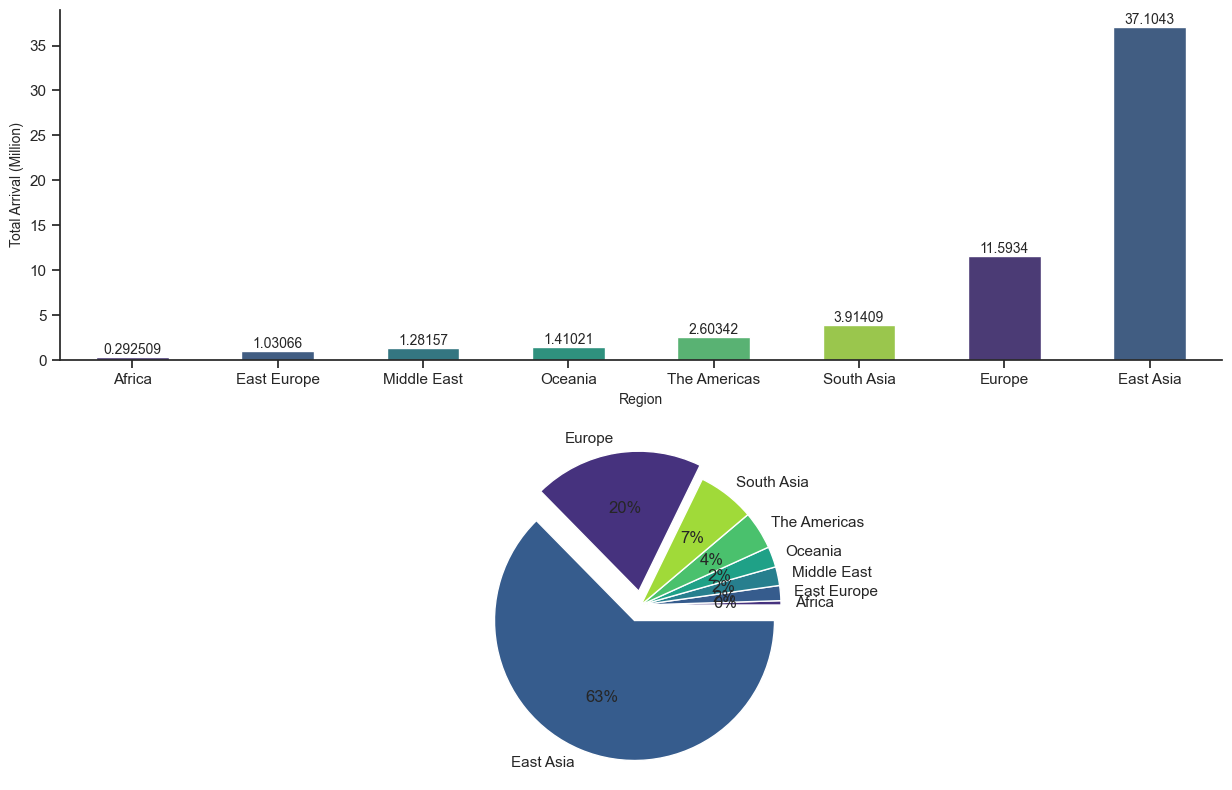

In [101]:
sns.set_style('white',{'ytick.left':True,'xtick.bottom':True,'axes.spines.right': False,
 'axes.spines.top': False})
color = sns.color_palette("viridis")

fig, (axes1,axes2) = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(data=df_region_arrival, x='Nationality', y='Total Arrivals', hue='Nationality', ax = axes1, width=0.5, dodge=False,palette=color)
for p in axes1.containers:
    axes1.bar_label(p, label_type='edge', fontsize=10)
axes1.set_xticklabels(axes1.get_xticklabels(), rotation=0)
axes1.legend([],[], frameon=False)
axes2 = plt.pie(df_region_arrival['Total Arrivals'], labels=df_region_arrival['Nationality'], autopct='%.0f%%',colors=color,explode=[0,0,0,0,0,0,0.1,0.12])
axes1.set_xlabel('Region',fontdict={'size':10})
axes1.set_ylabel('Total Arrival (Million)',fontdict={'size':10})
plt.show()

East Asia and Europe have the highest contribution amoung other regions. East asia and Europe have contributed for 63% and 20% respectively.

## East Asia

Considering the first contribution
* what nationality has entered Thailand the most from 2019-2022 (focus on the top three)
* How much money there countries in point 1 had spent in Thailand during the stay?
* See the relationship on how Covid had effected these people coming to Thailand?
* 


Text(0.5, 1.0, 'Tourist Arrival Proportion')

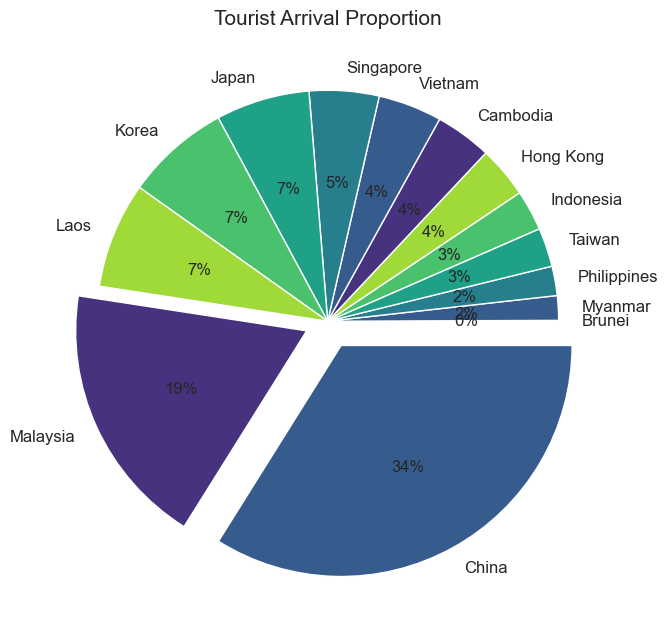

In [98]:
east_asian = country_th_arrival_melt[country_th_arrival_melt['Nationality'].isin(region_dict['East Asia'])]
east_asian = east_asian.groupby('Nationality')['num_arrival'].sum().sort_values().reset_index()
explode=[0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.12]
color = sns.color_palette("viridis")
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
ax = plt.pie(east_asian['num_arrival'], labels=east_asian['Nationality'], autopct='%.0f%%',colors=color,textprops={"fontsize":12},pctdistance=0.6,
             explode=explode)
plt.title('Tourist Arrival Proportion',fontdict={'fontsize':15})

In [92]:
east_asian

,Nationality,num_arrival
0,Brunei,0.023066
1,Myanmar,0.633975
2,Philippines,0.760201
3,Taiwan,1.005890
4,Indonesia,1.046820
5,Hong Kong,1.333413
6,Cambodia,1.460982
7,Vietnam,1.650364
8,Singapore,1.804019
9,Japan,2.426321


Text(0.5, 1.0, 'Tourist Arrival from China (Million)')

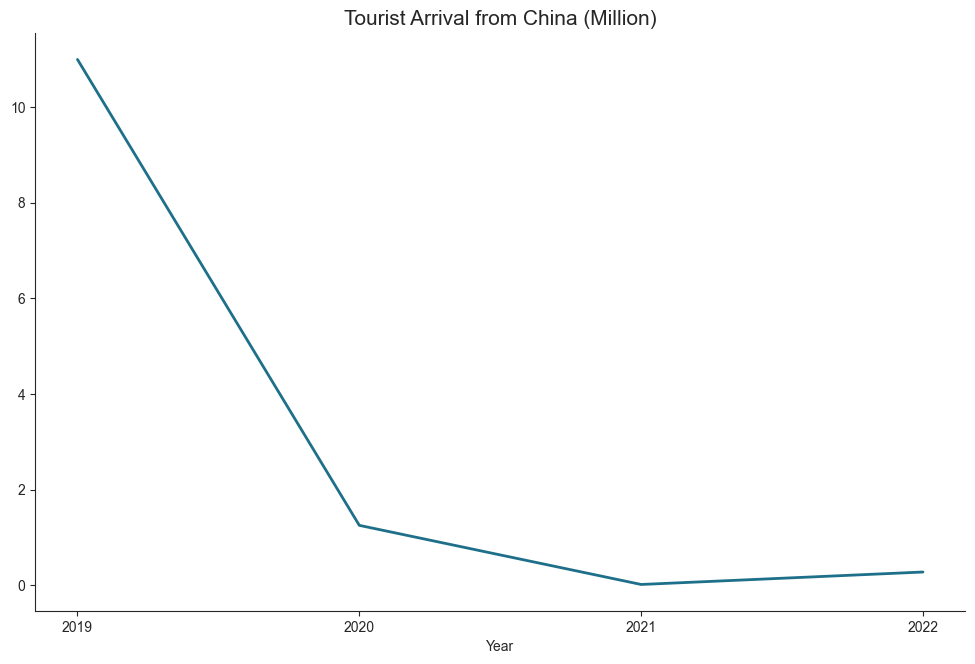

In [57]:
China_num = country_th_arrival_melt[country_th_arrival_melt['Nationality'] == 'China'].reset_index()
China_num

sns.set_style('white',{'ytick.left':True,'xtick.bottom':True,'axes.spines.right': False,
 'axes.spines.top': False})
fig, (axes1) = plt.subplots(1, 1, figsize=(12, 7.5))
sns.lineplot(data=China_num, x='year', y='num_arrival',ax=axes1,color='#1E6F89',linewidth = 2)

axes1.set_xlabel('Year',fontdict={'size':10})
axes1.set_ylabel('',fontdict={'size':10})
axes1.set_title('Tourist Arrival from China (Million)',fontdict={'fontsize':15})

In [58]:
country_th_arrival_melt['diff_num_base'] = country_th_arrival_melt.groupby('Nationality')['num_arrival'].apply(lambda x: x -(x.iloc[0]))
region_th_arrival_melt['diff_num_base'] = region_th_arrival_melt.groupby('Nationality')['num_arrival'].apply(lambda x: x -(x.iloc[0]))
display(country_th_arrival_melt)
display(region_th_arrival_melt)

/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_7845/2588909294.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  country_th_arrival_melt['diff_num_base'] = country_th_arrival_melt.groupby('Nationality')['num_arrival'].apply(lambda x: x -(x.iloc[0]))
/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_7845/2588909294.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To a

,Nationality,year,num_arrival,base_pct_change,diff_num_base
28,Argentina,2019,0.029498,0.000000,0.000000
73,Argentina,2020,0.012457,-57.770018,-0.017041
118,Argentina,2021,0.000382,-98.704997,-0.029116
163,Argentina,2022,0.008206,-72.181165,-0.021292
37,Australia,2019,0.767162,0.000000,0.000000
...,...,...,...,...,...
162,United Kingdom,2022,0.444432,-55.220326,-0.548054
8,Vietnam,2019,1.047663,0.000000,0.000000
53,Vietnam,2020,0.132514,-87.351467,-0.915149
98,Vietnam,2021,0.001794,-99.828762,-1.045869


,Nationality,year,num_arrival,base_pct_change,diff_num_base
8,Africa,2019,0.198308,0.000000,0.000000
17,Africa,2020,0.024265,-87.763983,-0.174043
26,Africa,2021,0.003275,-98.348529,-0.195033
35,Africa,2022,0.066661,-66.385118,-0.131647
1,Asean,2019,10.751957,0.000000,0.000000
10,Asean,2020,1.652593,-84.629840,-9.099364
19,Asean,2021,0.032820,-99.694753,-10.719137
28,Asean,2022,4.526645,-57.899339,-6.225312
0,East Asia,2019,27.391050,0.000000,0.000000
9,East Asia,2020,3.739408,-86.348066,-23.651642


## Europe

Considering the first contribution
* what nationality has entered Thailand the most from 2019-2022 (focus on the top three)
* How much money there countries in point 1 had spent in Thailand during the stay?
* See the relationship on how Covid had effected these people coming to Thailand?
* 


In [59]:
East_Asia_arrival = region_th_arrival_melt.loc[region_th_arrival_melt['Nationality'].isin(['East Asia'])]
# waterfall(East_Asia_arrival['year'], East_Asia_arrival['pct_change'])

### Income from Chinese traveller can compensate the money the goverment had spent during Covid or not?

<AxesSubplot: xlabel='year', ylabel='num_arrival'>

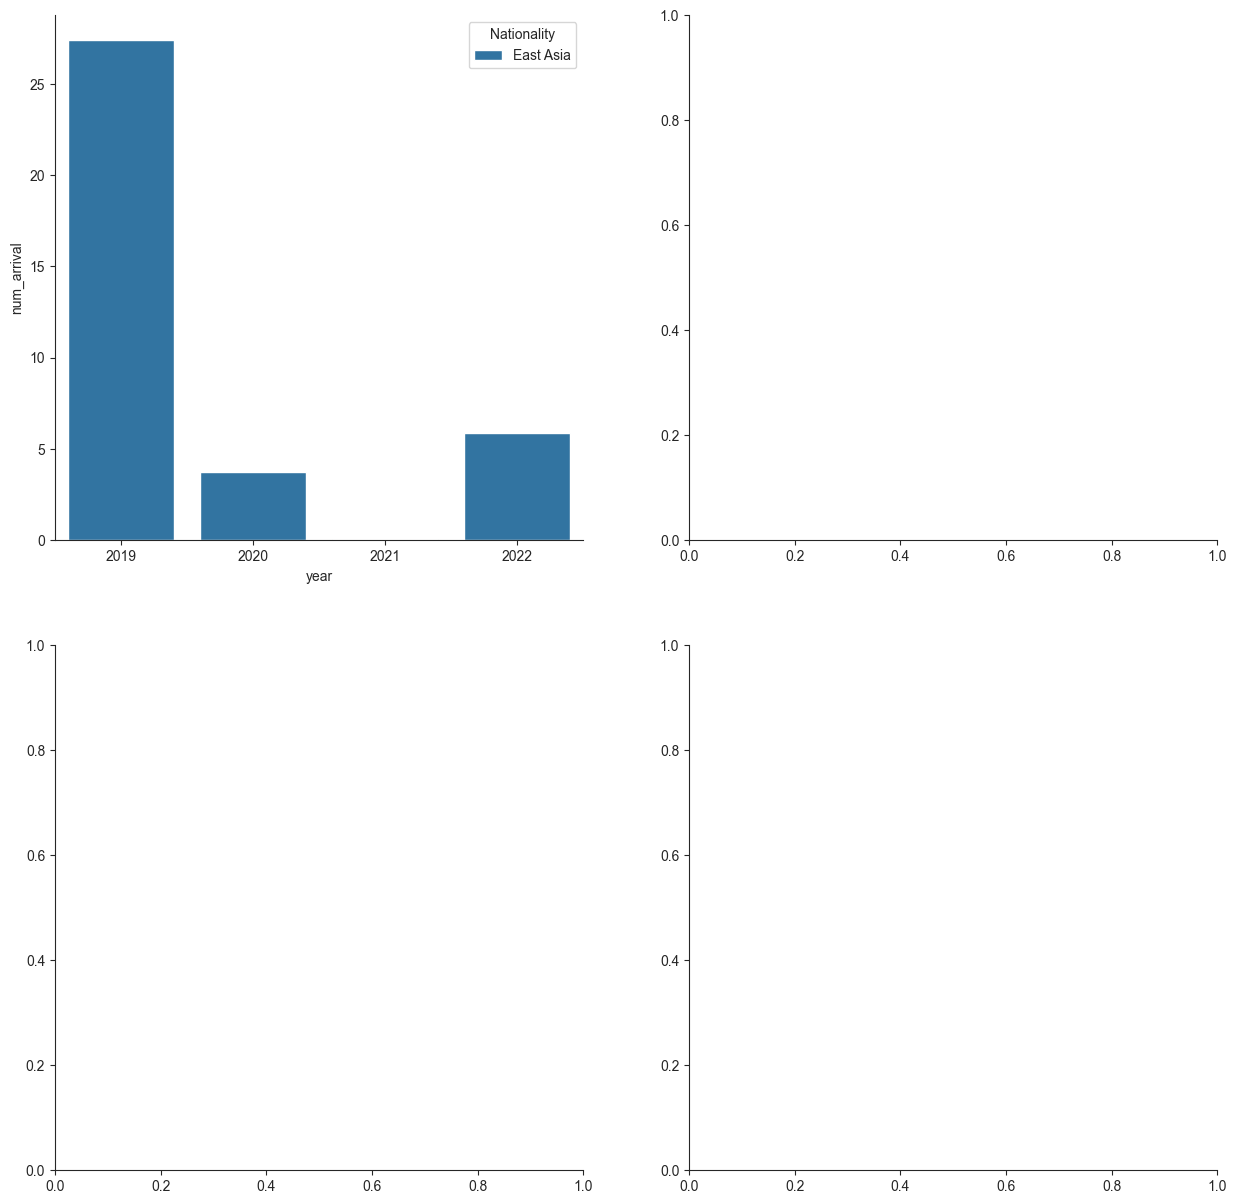

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# axes.ticklabel_format(axis='y', style='plain')

sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['Nationality'].isin(['East Asia'])],x='year',y='num_arrival',hue='Nationality',ax=axes[0,0])

##for index, row in df_region_arrival.loc[df_region_arrival['Nationality'] == 'East Asia'].iterrows():
    ##axes[0, 0].text(row.name, row.num_arrival, row.num_arrival - 20, color='black', ha="center")


#### Total Spending per Capita

In [61]:
region_th_stay_spend_2018['Spending per Capita (Bath/Stay)'] = region_th_stay_spend_2018['Spending per Capita (Baht/Day)'] * region_th_stay_spend_2018['Length of Stay (Days)']
region_th_stay_spend_2019['Spending per Capita (Bath/Stay)'] = region_th_stay_spend_2019['Spending per Capita (Baht/Day)'] * region_th_stay_spend_2019['Length of Stay (Days)']

country_th_stay_spend_2018['Spending per Capita (Bath/Stay)'] = country_th_stay_spend_2018['Spending per Capita (Baht/Day)'] * country_th_stay_spend_2018['Length of Stay (Days)']
country_th_stay_spend_2019['Spending per Capita (Bath/Stay)'] = country_th_stay_spend_2019['Spending per Capita (Baht/Day)'] * country_th_stay_spend_2019['Length of Stay (Days)']

/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_7845/401202287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_th_stay_spend_2018['Spending per Capita (Bath/Stay)'] = region_th_stay_spend_2018['Spending per Capita (Baht/Day)'] * region_th_stay_spend_2018['Length of Stay (Days)']
/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_7845/401202287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_th_stay_spend_2019['Spending per Capita (Bath/Stay)'] = region_th_stay_spend_

## Visualization

In [62]:
display(region_th_arrival_melt.sort_values(['num_arrival'],ascending=False).head(5))
display(country_th_arrival_melt.sort_values(['num_arrival'],ascending=False).head(5))

,Nationality,year,num_arrival,base_pct_change,diff_num_base
0,East Asia,2019,27.391050,0.000000,0.000000
1,Asean,2019,10.751957,0.000000,0.000000
2,Europe,2019,6.711816,0.000000,0.000000
27,East Asia,2022,5.900461,-78.458434,-21.490589
28,Asean,2022,4.526645,-57.899339,-6.225312


,Nationality,year,num_arrival,base_pct_change,diff_num_base
9,China,2019,10.997169,0.000000,0.000000
4,Malaysia,2019,4.272584,0.000000,0.000000
33,India,2019,1.995363,0.000000,0.000000
139,Malaysia,2022,1.948549,-54.394132,-2.324035
12,Korea,2019,1.890959,0.000000,0.000000


In [63]:
display(country_th_stay_spend_2018.sort_values('Spending per Capita (Bath/Stay)',ascending=False).head(5))
display(country_th_stay_spend_2019.sort_values('Spending per Capita (Bath/Stay)',ascending=False).head(5))

,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
54,Kuwait,77365.0,13.14,7254.92,7375.19,95329.6488
55,Saudi Arabia,35090.0,12.55,7406.64,3261.73,92953.3320
53,Israel,185366.0,17.35,5218.09,16781.90,90533.8615
20,Denmark,170044.0,16.70,5360.26,15221.72,89516.3420
29,Sweden,304206.0,19.13,4640.02,27002.46,88763.5826


,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
26,Norway,130509.0,17.40,5271.56,11970.93,91725.1440
54,Kuwait,84504.0,13.05,6960.06,7675.40,90828.7830
55,Saudi Arabia,36783.0,12.83,6823.42,3220.15,87544.4786
20,Denmark,159526.0,17.04,5070.83,13784.14,86406.9432
29,Sweden,279451.0,19.15,4442.05,23771.56,85065.2575


In [64]:
display(region_th_stay_spend_2018.sort_values('Spending per Capita (Bath/Stay)',ascending=False)) ##.head(5))
display(region_th_stay_spend_2019.sort_values('Spending per Capita (Bath/Stay)',ascending=False)) ##.head(5))

,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
51,Middle East,767796.0,12.89,6243.92,61795.44,80484.1288
47,Oceania,911038.0,13.38,5538.50,67512.64,74105.1300
34,The Americas,1534008.0,14.86,4880.21,111246.21,72519.9206
58,Africa,200328.0,12.70,5686.13,14466.45,72213.8510
17,Europe,6603695.0,16.85,4179.71,465086.23,70428.1135
32,East Europe,487669.0,14.20,4467.29,30935.49,63435.5180
40,South Asia,1935883.0,7.69,5847.95,87058.06,44970.7355
0,East Asia,26225446.0,6.90,5907.36,1068971.87,40760.7840
1,Asean,10348768.0,5.65,5452.61,318816.91,30807.2465


,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
51,Middle East,727318.0,12.90,6115.83,57381.19,78894.2070
47,Oceania,874154.0,13.19,5368.45,61898.66,70809.8555
17,Europe,6531220.0,16.82,4084.87,448743.81,68707.5134
58,Africa,196819.0,12.22,5531.79,13304.65,67598.4738
34,The Americas,1559800.0,14.46,4659.25,105087.99,67372.7550
32,East Europe,532911.0,14.09,4262.82,32008.29,60063.1338
40,South Asia,2356977.0,7.68,5533.66,100168.16,42498.5088
0,East Asia,27669963.0,7.08,5743.76,1125223.49,40665.8208
1,Asean,10876922.0,5.90,5335.05,342370.64,31476.7950


##### Number of Arrival by Region

Text(0, 0.5, 'Year')

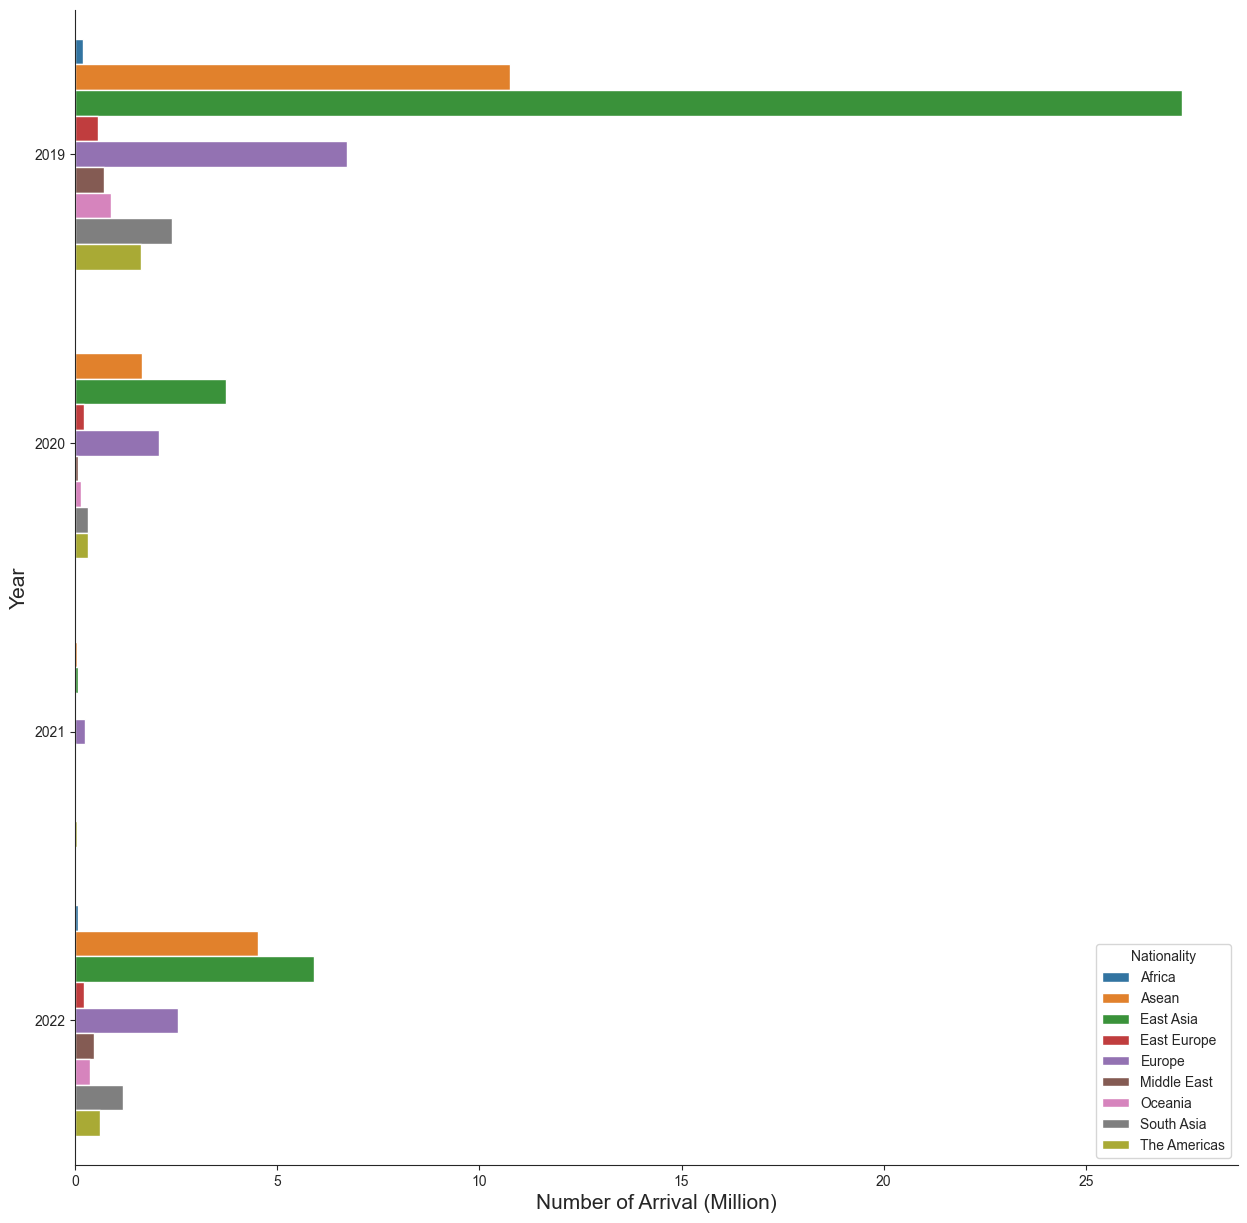

In [65]:
fig, axes = plt.subplots( figsize=(15, 15))
axes.ticklabel_format(axis='x', style='plain')

sns.barplot(region_th_arrival_melt,x='num_arrival',y='year',hue='Nationality')
axes.set_xlabel('Number of Arrival (Million)',fontdict={'size':15})
axes.set_ylabel('Year',fontdict={'size':15})

<AxesSubplot: xlabel='year', ylabel='num_arrival'>

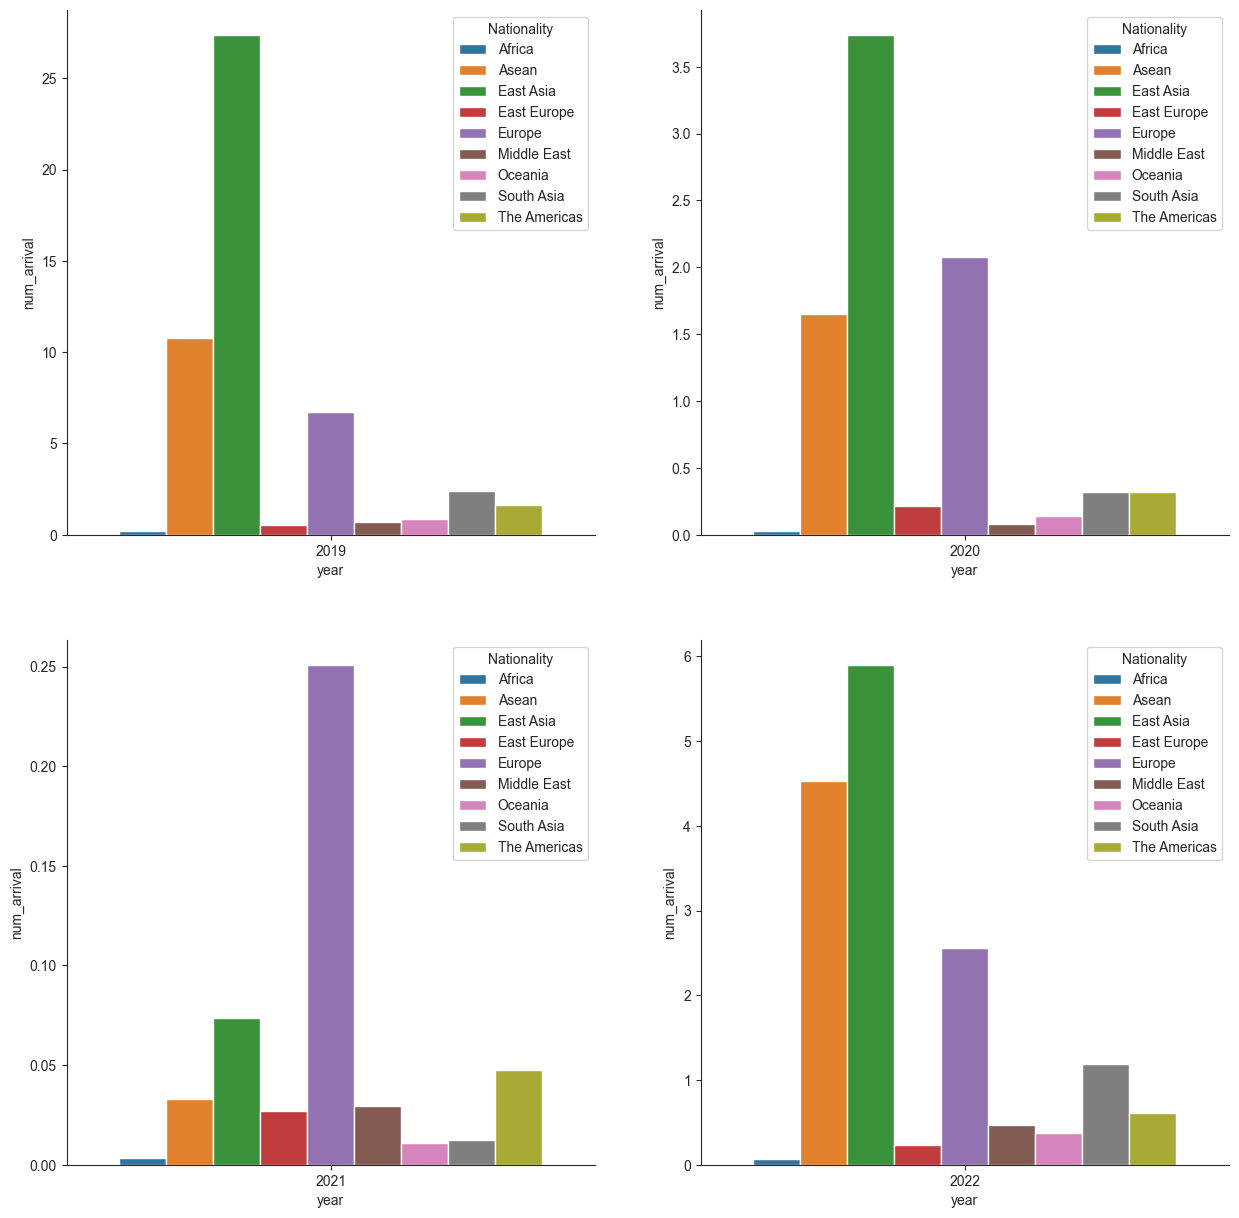

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# axes.ticklabel_format(axis='y', style='plain')

sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2019'])],x='year',y='num_arrival',hue='Nationality',ax=axes[0,0])
sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2020'])],x='year',y='num_arrival',hue='Nationality',ax=axes[0,1])
sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2021'])],x='year',y='num_arrival',hue='Nationality',ax=axes[1,0])
sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2022'])],x='year',y='num_arrival',hue='Nationality',ax=axes[1,1])

#### Number of Arrival from Asia

Text(0, 0.5, 'Year')

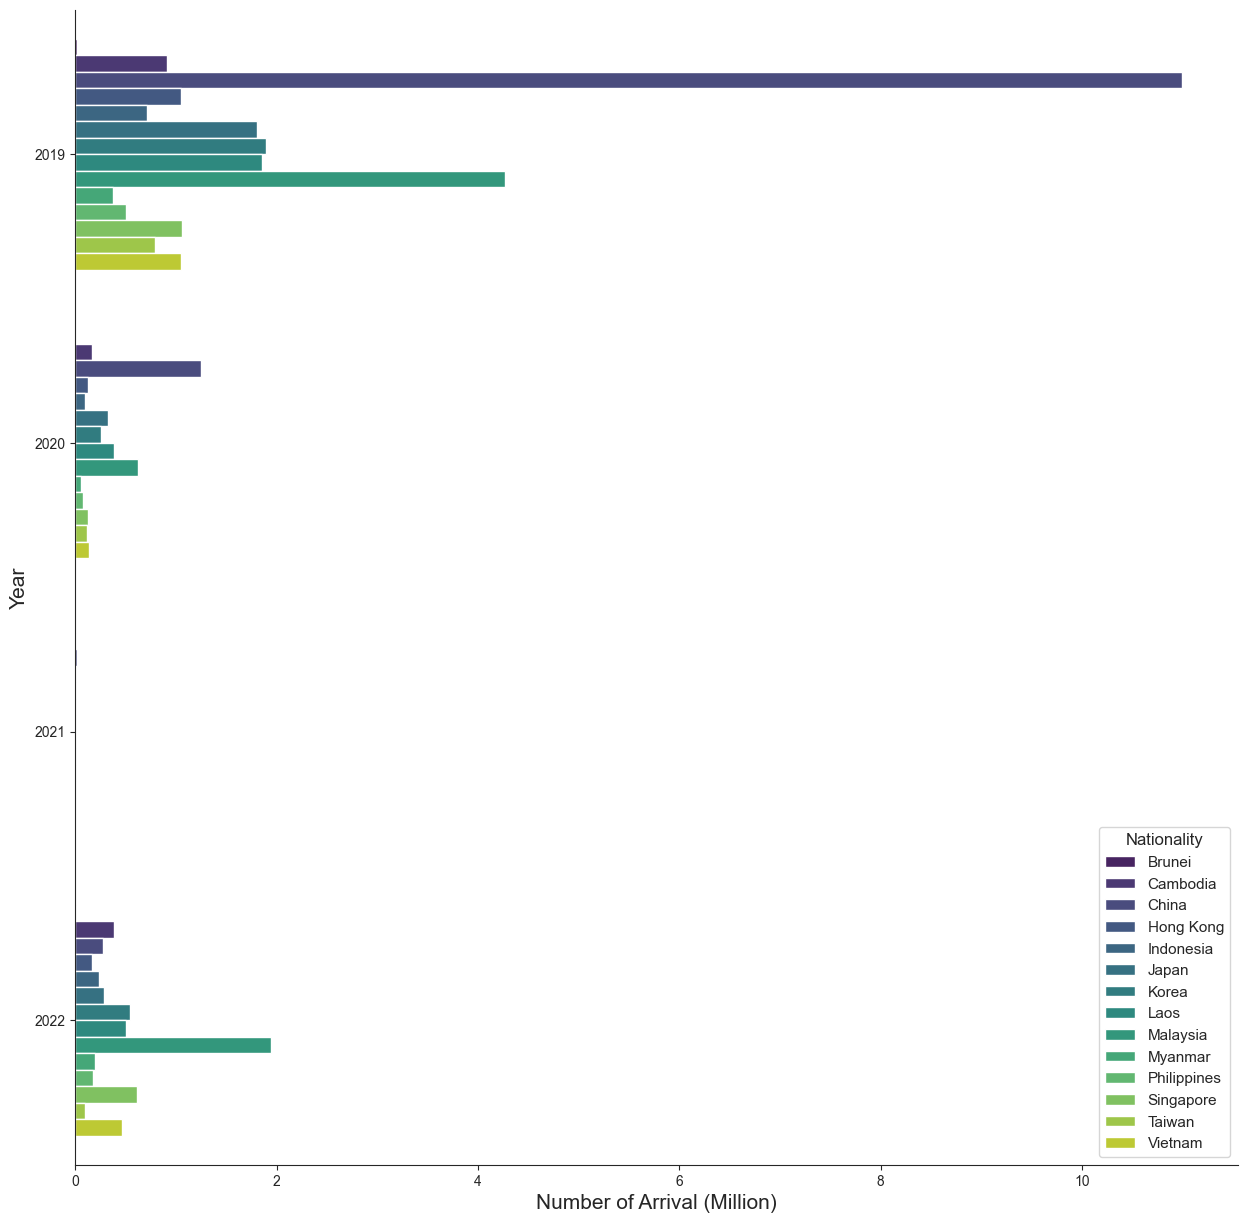

In [67]:
fig, axes = plt.subplots( figsize=(15, 15))
axes.ticklabel_format(axis='x', style='plain')
sns.set_theme(style="whitegrid")

axes = sns.barplot(country_th_arrival_melt.loc[country_th_arrival_melt['Nationality'].isin(region_dict['East Asia'])],
            x='num_arrival',y='year',hue='Nationality',palette='viridis')
axes.set_xlabel('Number of Arrival (Million)',fontdict={'size':15})
axes.set_ylabel('Year',fontdict={'size':15})

ValueError: Could not interpret input 'pct_change'

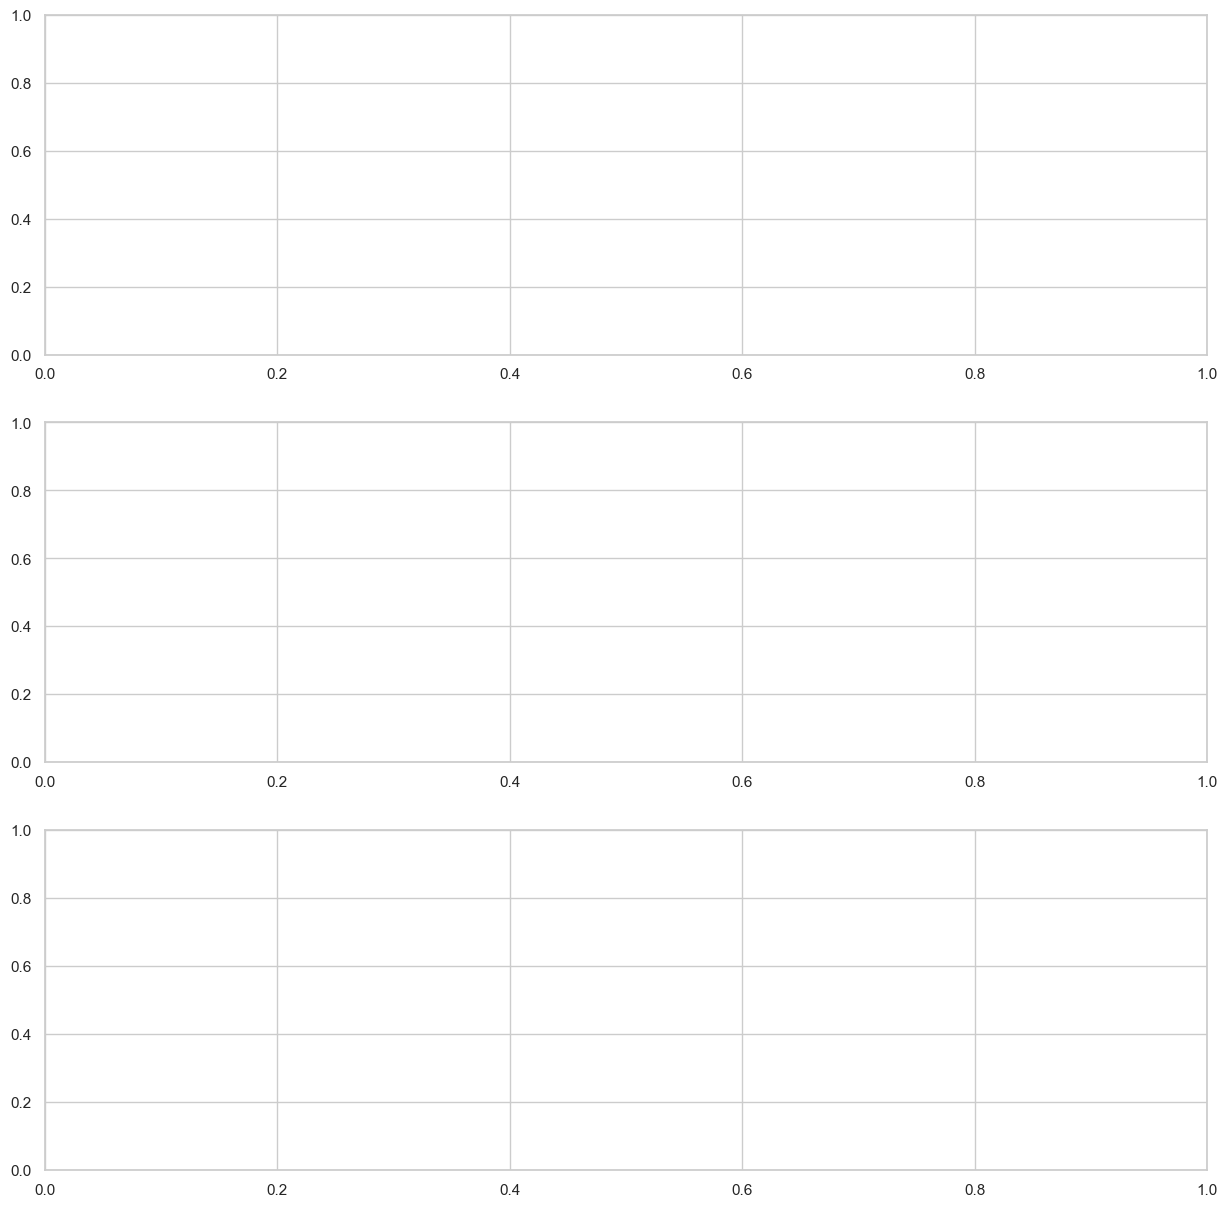

In [68]:
fig,(ax1,ax2,ax3) = plt.subplots(3, figsize=(15, 15))
# axes.ticklabel_format(axis='x', style='plain')
sns.set_theme(style="whitegrid")

sns.barplot(region_th_arrival_melt.loc[(region_th_arrival_melt['Nationality'].isin(region_list)) & (region_th_arrival_melt['year'].isin(['2020']))],
            x='pct_change',y='Nationality',ax=ax1,palette='viridis').set(xlabel='2020 Change (%)')
sns.barplot(region_th_arrival_melt.loc[(region_th_arrival_melt['Nationality'].isin(region_list)) & (region_th_arrival_melt['year'].isin(['2021']))],
            x='pct_change',y='Nationality',ax=ax2,palette='viridis').set(xlabel='2021 Change (%)')
sns.barplot(region_th_arrival_melt.loc[(region_th_arrival_melt['Nationality'].isin(region_list)) & (region_th_arrival_melt['year'].isin(['2022']))],
            x='pct_change',y='Nationality',ax=ax3,palette='viridis').set(xlabel='2022 Change (%)')

# plot pie chart for expend